In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [4]:
df  = pd.read_csv("/content/drive/MyDrive/Project 01 AIML_lab/train.csv")

In [5]:
df


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,500,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
329,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
330,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
331,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


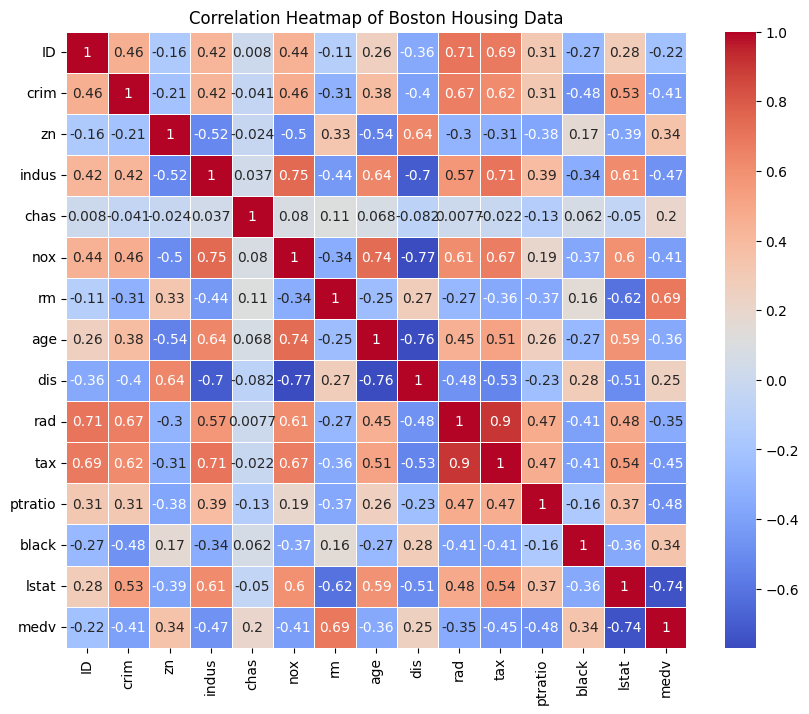

In [7]:

# Calculate the correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Display the heatmap
plt.title('Correlation Heatmap of Boston Housing Data')
plt.show()


In [8]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Extract correlation values with 'medv'
medv_corr = corr_matrix['medv'].sort_values(ascending=False)

# Display the correlation of 'medv' with other attributes
print(medv_corr)


medv       1.000000
rm         0.689598
zn         0.344842
black      0.336660
dis        0.249422
chas       0.204390
ID        -0.221694
rad       -0.352251
age       -0.358888
crim      -0.407454
nox       -0.413054
tax       -0.448078
indus     -0.473932
ptratio   -0.481376
lstat     -0.738600
Name: medv, dtype: float64


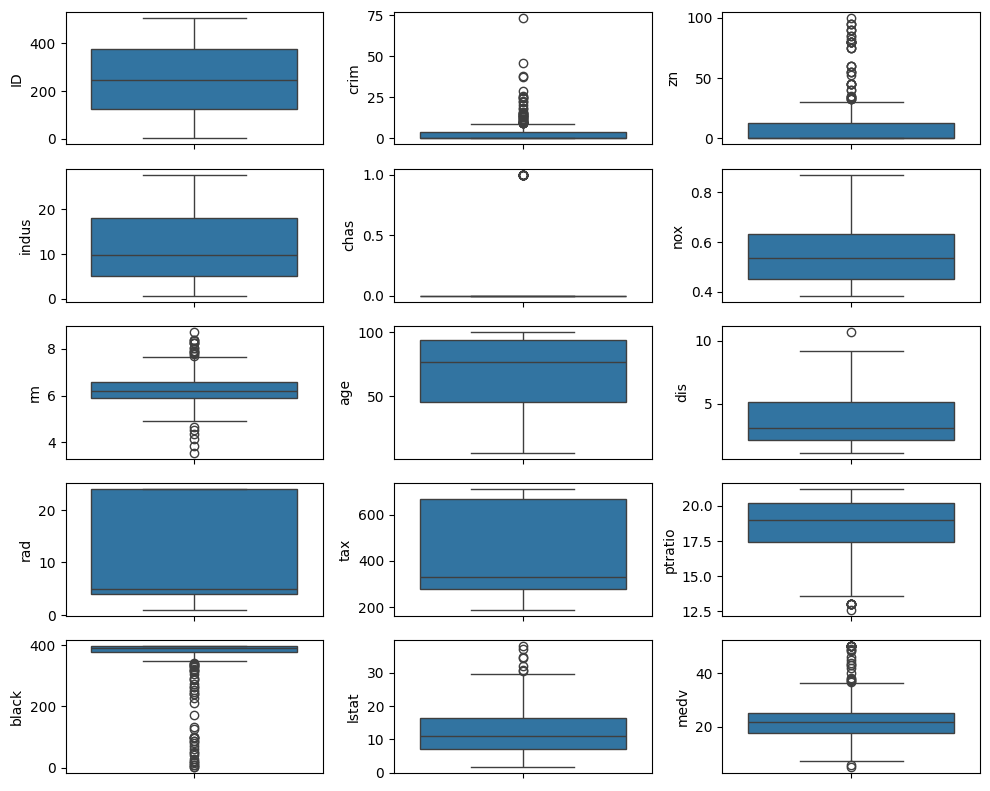

In [9]:
# Box-plots for visualizing outlier
fig, axs = plt.subplots(nrows=5,ncols=3,figsize=(10,8))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k,data=df,ax=axs[index])
    index+=1
plt.tight_layout()

In [10]:
# Removing Outliers
df=df[~((df['crim']>=25))]
df = df[~((df['rm']>=8.5)|(df['rm']<4))]
df=df[~((df['lstat']>=30))]

In [11]:
df1 = df.drop(columns=['ID','chas'])


In [12]:
df1

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.08829,12.5,7.87,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,0.17783,0.0,9.69,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
329,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
330,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
331,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


In [13]:
df1.isna().sum()

,0
crim,0
zn,0
indus,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0
ptratio,0


In [14]:
df1.duplicated().sum()

0

In [15]:
df1

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.08829,12.5,7.87,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,0.17783,0.0,9.69,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
329,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
330,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
331,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


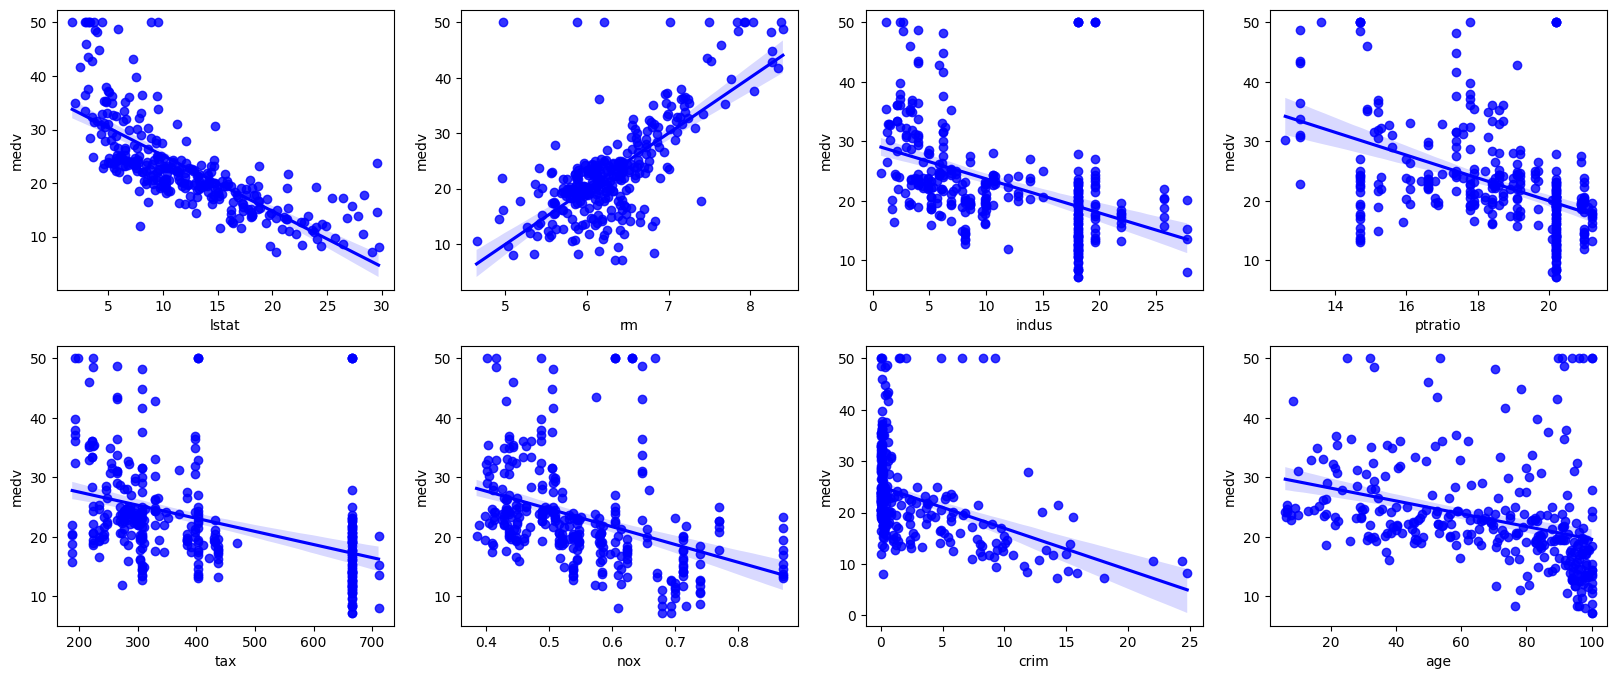

In [16]:
# Plots for analysing relationship among features
fig, axs = plt.subplots(nrows=2,ncols=4,figsize=(20,8))
cols = ['lstat','rm','indus','ptratio','tax','nox','crim','age']
for col,ax in zip(cols,axs.flat):
    sns.regplot(x=df1[col],y=df1['medv'],color = 'blue',ax=ax)

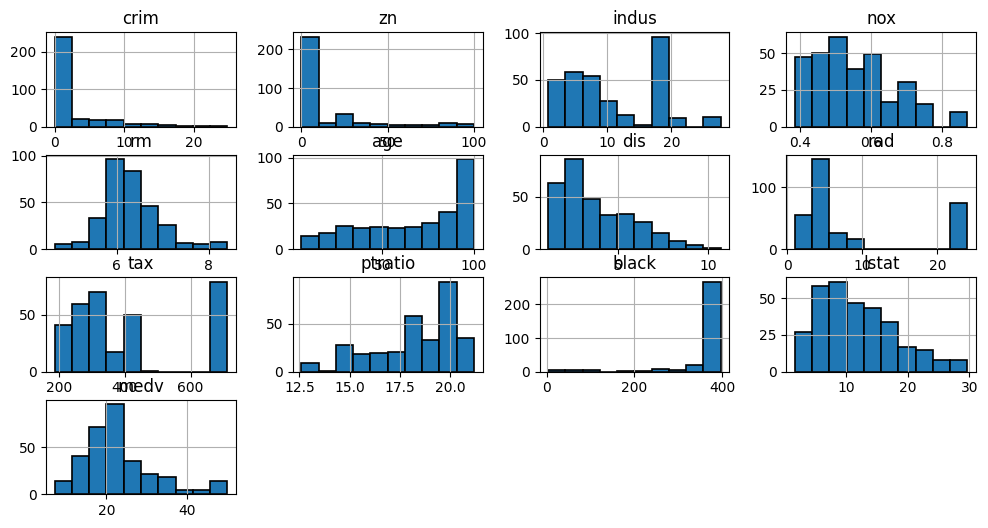

In [17]:
df1.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

In [18]:
# Training model on original data
# Model Evaluation after Feature Selection
X0 = df1.iloc[:,1:12].values
Y0 = df1.iloc[:,-1].values
LR0 = LinearRegression()
LR0.fit(X0,Y0)
print("Intercept : ", LR0.intercept_)
print("Slope : ", LR0.coef_)

Intercept :  22.084795699141246
Slope :  [ 3.39194209e-02  1.10667959e-01 -1.10513137e+01  5.06857620e+00
 -1.02757256e-02 -1.29581224e+00  2.79102915e-01 -1.30666241e-02
 -8.48765643e-01  1.38567487e-02 -6.35748616e-01]


In [19]:
# Evaluating model
Y0_pred = LR0.predict(X0)
RMSE0 = np.sqrt(mean_squared_error(Y0,Y0_pred))
print("Root Mean Square Error : ", RMSE0)

Root Mean Square Error :  4.5426336922147765


Predicted MEDV values with corresponding IDs:
      ID  Predicted_MEDV
0      3       31.279474
1      6       25.644671
2      8       18.669399
3      9        9.704693
4     10       18.187768
..   ...             ...
168  496       15.675309
169  497       12.071867
170  499       20.149564
171  501       19.043789
172  505       25.099190

[173 rows x 2 columns]


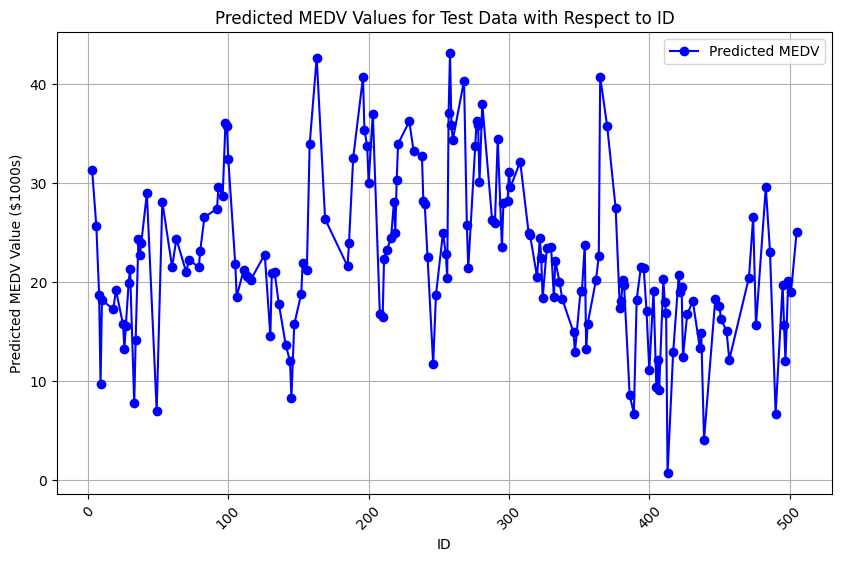

In [20]:

# Load the training dataset
train_data = pd.read_csv('/content/drive/MyDrive/Project 01 AIML_lab/train.csv')

# Load the test dataset (assuming test data has an 'ID' column for tracking)
test_data = pd.read_csv('/content/drive/MyDrive/Project 01 AIML_lab/test.csv')

# Separate features (X) and target (y) in the training dataset
X_train = train_data.drop(columns=['medv'])
y_train = train_data['medv']

# Use the test dataset for prediction, assuming there's an 'ID' column
X_test = test_data  # Drop 'ID' from features for prediction
test_ids = test_data['ID']  # Store 'ID' column for later use

# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the test data (no MEDV column)
y_pred = model.predict(X_test)

# Create a DataFrame with ID and predicted MEDV values
results = pd.DataFrame({'ID': test_ids, 'Predicted_MEDV': y_pred})

# Print the predicted values with IDs
print("Predicted MEDV values with corresponding IDs:")
print(results)

# Plot the predicted MEDV values with respect to ID
plt.figure(figsize=(10, 6))
plt.plot(results['ID'], results['Predicted_MEDV'], label='Predicted MEDV', marker='o', linestyle='-', color='b')
plt.title('Predicted MEDV Values for Test Data with Respect to ID')
plt.xlabel('ID')
plt.ylabel('Predicted MEDV Value ($1000s)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()